# CPE695 HW2
**By: Tyler Bryk**



In [13]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

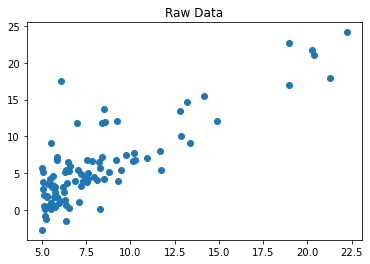

In [14]:
# Input Raw Data and Plot
data = pd.read_csv('data2.txt', header = None)
x = np.expand_dims(data[0].to_numpy(), axis=1)
y = np.expand_dims(data[1].to_numpy(), axis=1)
xB = np.c_[np.ones((97, 1)), x] # Set Bias to 1 

plt.scatter(x, y)
plt.title('Raw Data')
plt.show()

# Normal Closed-Form Equation
Here, the normal closed-form equation will be used to calculate the linear regression coefficients. The code and results for this method are shown below. 

In [15]:
# Implement Normal Equation where:    Coefficients = (X.T * X)^(-1) * X.T * Y  
def normEquation(x, y):  
  return inv((x.T).dot(x)).dot(x.T).dot(y)

coeffNorm = normEquation(xB,y)
print("Using Normal EQ the Coefficients are: ", coeffNorm[0], coeffNorm[1])

Using Normal EQ the Coefficients are:  [-3.89578088] [1.19303364]


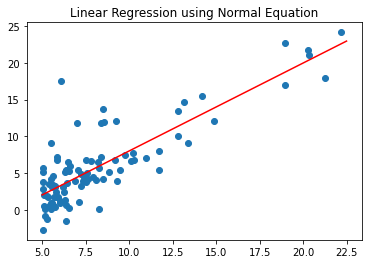

In [16]:
# Plot Regression Line for Normal Equation
xRange = np.linspace(5, 22.5)
yNorm = [coeffNorm[0] + coeffNorm[1]*w  for w in xRange]
plt.scatter(x, y)
plt.plot(xRange, yNorm, 'r-')
plt.title('Linear Regression using Normal Equation')
plt.show()

# Batch Gradient Descent
Here, we will implement the batch gradient descent technique by attempting to minimize the cost function *J* using the entire data set. The code for the BGD method is shown below. The returned coefficients are similar to the ones returned from using the normal equation. Underneath the BGD code, a visualization is made which shows the optimal number of iterations, and the learning rate. As for the iteration number, the graph shows that the cost converges around 500 iterations, however, we selected 1000 iterations as our termination condition since it gave better accuracy. Equally, a few various learning rates were plotted, and the results show that a learning rate of alpha=0.02 was the best. Any learning rate of 0.03 or larger will not converge to a local minimum. Therefore, our parameters for this model were alpha=0.02 and iter=1000. The results for this method are shown below. 

In [17]:
# Implement Batch Gradient Descent where All Training Data is Used

iterations = 1000
alpha = 0.02                # Learning Rate
theta = np.array([0, 0])    # Placeholder for Coefficients

# Cost J = (1/N) * SUM[ (xPred - Y)^2 ]
def costFunction(x, y, theta): 
    return np.sum((x.dot(theta) - y)**2) / len(x)

def batchGD(x, y, theta, alpha, iterations):
    costHistory = [0] * iterations
    for iteration in range(iterations):
        hypothesis = x.dot(theta)
        loss = hypothesis - y
        gradient = x.T.dot(loss) / len(x)
        theta = theta - alpha*gradient
        costHistory[iteration] = costFunction(x, y, theta)
    return theta, costHistory

coeffBatch, cost = batchGD(xB, y.flatten(), theta, alpha, iterations)
print("Using Batch Gradient Descent the Coefficients are: ", coeffBatch[0], ', ', coeffBatch[1])

Using Batch Gradient Descent the Coefficients are:  -3.7884192615511836 ,  1.1822480052540147


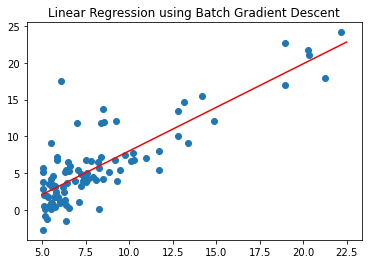

In [18]:
# Plot Regression Line for Batch Gradient Descent
xRange = np.linspace(5, 22.5)
yBatch = [coeffBatch[0] + coeffBatch[1]*w  for w in xRange]
plt.scatter(x, y)
plt.plot(xRange, yBatch, 'r-')
plt.title('Linear Regression using Batch Gradient Descent')
plt.show()

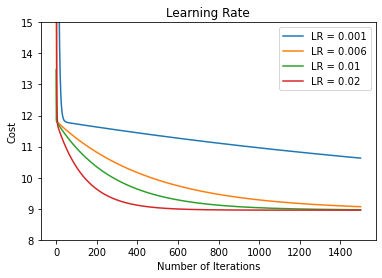

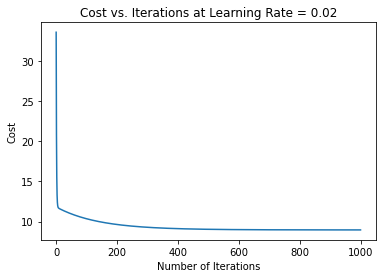

In [19]:
# Find Optimal Learning Rate
plt.plot(range(1500), batchGD(xB, y.flatten(), theta, alpha=0.001, iterations=1500)[1])
plt.plot(range(1500), batchGD(xB, y.flatten(), theta, alpha=0.006, iterations=1500)[1])
plt.plot(range(1500), batchGD(xB, y.flatten(), theta, alpha=0.010, iterations=1500)[1])
plt.plot(range(1500), batchGD(xB, y.flatten(), theta, alpha=0.020, iterations=1500)[1])
plt.ylim((8,15))
plt.legend(['LR = 0.001', 'LR = 0.006', 'LR = 0.01', 'LR = 0.02'])
plt.title("Learning Rate")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Find Optimal Number of Iterations
plt.plot(range(1000), batchGD(xB, y.flatten(), theta, alpha, iterations=1000)[1])
plt.title("Cost vs. Iterations at Learning Rate = 0.02")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Stochastic Gradient Descent
Here, we will implement the stochastic gradient descent technique by attempting to minimize the cost function *J* using one sample at a time. The code for the SGD method is shown below. The returned coefficients are similar to the ones returned from using the normal equation and BGD methods. Underneath the SGD code, a visualization is made which shows the optimal number of iterations, and the learning rate. As for the iteration number, the graph shows that the cost converges around 300-400 iterations, therefore, 400 iterations was chosen as our termination condition. Equally, a few various learning rates were plotted, and the results show that a learning rate of alpha=0.1 was the best. Therefore, our parameters for this model were alpha=0.1 and iter=400. The results for this method are shown below. 


In [20]:
# Implement Stochastic Gradient Descent where One Training Sample is Used

iterations = 400
alpha = 0.1                 # Learning Rate
theta = np.array([0, 0])    # Placeholder for Coefficients

# Cost J = (1/N) * SUM[ (xPred - Y)^2 ]
def costFunction(x, y, theta): 
    return np.sum((x.dot(theta) - y)**2) / len(x)
    
def SGD(x, y, theta, alpha, iterations):
    costHistory = [0] * iterations
    for iteration in range(iterations):
      for row in range(len(x)):
        hypothesis = x[row].dot(theta)
        loss = hypothesis - y[row]
        gradient = x[row].T.dot(loss) / len(x)
        theta = theta - alpha*gradient
        costHistory[iteration] = costFunction(x[row], y[row], theta)
    return theta, costHistory

coeffSGD, cost = SGD(xB, y.flatten(), theta, alpha, iterations)
print("Using Stochastic Gradient Descent the Coefficients are: ", coeffSGD[0], ', ', coeffSGD[1])

Using Stochastic Gradient Descent the Coefficients are:  -3.8080810159300764 ,  1.018478723940661


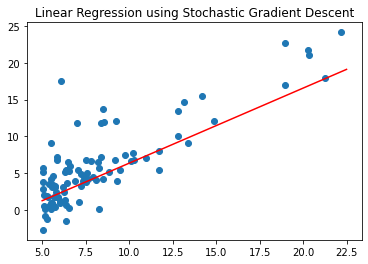

In [21]:
# Plot Regression Line for Stochastic Gradient Descent
xRange = np.linspace(5, 22.5)
yStoch = [coeffSGD[0] + coeffSGD[1]*w  for w in xRange]
plt.scatter(x, y)
plt.plot(xRange, yStoch, 'r-')
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.show()

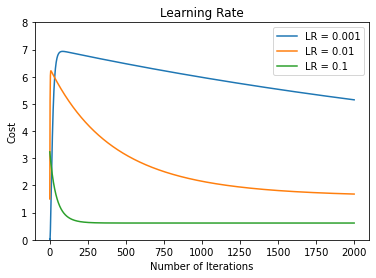

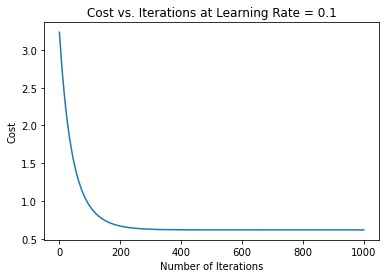

In [22]:
# Find Optimal Learning Rate
plt.plot(range(2000), SGD(xB, y.flatten(), theta, alpha=0.001, iterations=2000)[1])
plt.plot(range(2000), SGD(xB, y.flatten(), theta, alpha=0.010, iterations=2000)[1])
plt.plot(range(2000), SGD(xB, y.flatten(), theta, alpha=0.100, iterations=2000)[1])
plt.ylim((0,8))
plt.legend(['LR = 0.001', 'LR = 0.01', 'LR = 0.1'])
plt.title("Learning Rate")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Find Optimal Number of Iterations
plt.plot(range(1000), SGD(xB, y.flatten(), theta, alpha, iterations=1000)[1])
plt.title("Cost vs. Iterations at Learning Rate = 0.1")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Discussion on Batch Gradient Descent vs. SGD

Overall, both the Batch Gradient Descent and Stochastic Gradient Descent methods yielded similar coefficients. It was noticed that the SGD method required less iterations to converge when compared to the BGD method. However, the BGD method became very unstable at higher learning rates, so it is difficult to make a fair comparison. In terms of accuracy, it appears that the SGD method was more accurate all around. 